
# TASK 2 (Data analysis)

### In this task, use your data analytics skills to answer the question posed in the Task 1. Depending upon your chosen question, you will typically have to perform Exploratory Data Analysis (EDA), data pre-processing, statistics-based data analysis, data visualisation and use unsupervised machine learning algorithms (e.g., clustering).

### Business Analytical Question:  What are the key determinants of pricing for Airbnb listings in NYC? How do factors like location, property type, and reviews influence the price?



In [ ]:
#import pandas and numpy for data preprocessing and manipulation

import pandas as pd
import numpy as np

In [ ]:
# mounting google drive and loading csv file into dataframe

folder_path = '/content/drive/MyDrive/TeamProject/AB_NYC_2019.csv'

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv(folder_path)

MessageError: ignored

#Data Preprocessing


In [ ]:
#inspect data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#number of rows and columns
df.shape

(48895, 16)

In [ ]:
#column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#check data types
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


In [ ]:
# Handling missing values
df['name'].fillna('Unknown', inplace=True) #replace missing names with 'unknown'
df['host_name'].fillna('Unknown', inplace=True) #replace missing host names with 'unknown'
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')  # Convert to datetime
df['last_review'].fillna(pd.Timestamp('1900-01-01'), inplace=True)  # Placeholder for no reviews
df['reviews_per_month'].fillna(0, inplace=True)  # Replacing no reviews with 0


In [ ]:
#check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


## Exploratory Data Analysis

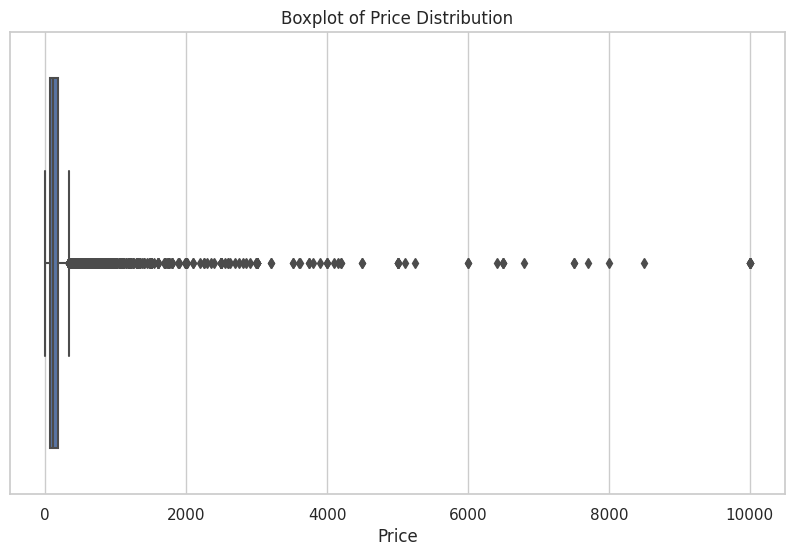

In [ ]:
#Distribution of Prices,

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a boxplot for the price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price Distribution')
plt.xlabel('Price')
plt.show()

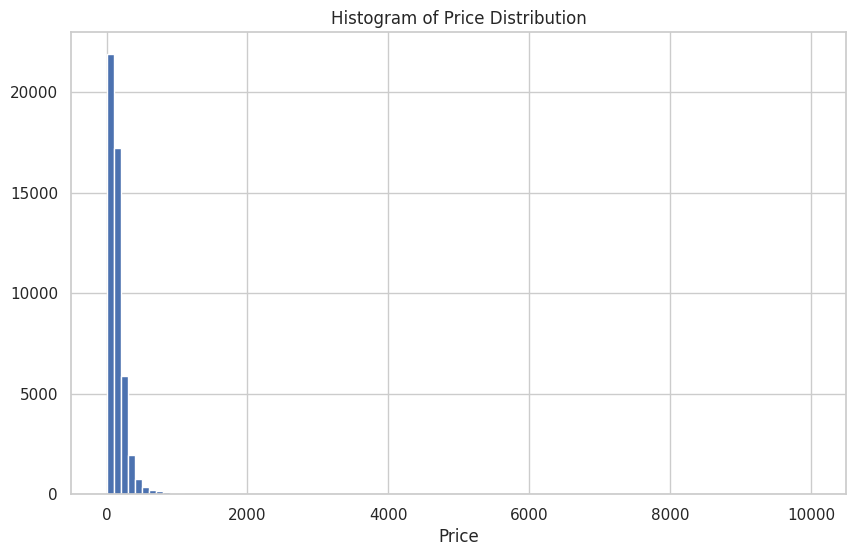

In [ ]:
# Create a boxplot for the price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100)
plt.title('Histogram of Price Distribution')
plt.xlabel('Price')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution Across Room Types')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

NameError: ignored

In [ ]:
#Extract numerical features for examination
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.columns

##Extract categorical features for examination
categorical_df = df.select_dtypes(include=[np.object])
categorical_df.columns

NameError: ignored